In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [32]:
def catmap(x, y, xdim, ydim):
    return (x + y) % xdim, (x + 2*y) % ydim

In [33]:
def step(img):
    xdim = img.shape[0]
    ydim = img.shape[1]
    new_img = np.array(img)
    
    for x, row in enumerate(img):
        for y, _ in enumerate(row):
            newx, newy = catmap(x, y, xdim, ydim)
            new_img[newx][newy] = img[x][y]
    
    return new_img

In [3]:
cat = mpimg.imread('cat.jpg')

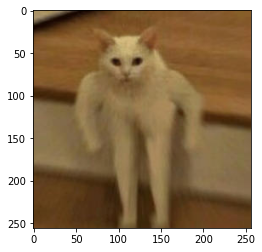

In [34]:
plt.imshow(cat)

In [417]:
new_cat = step(new_cat)

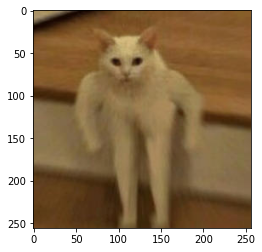

In [418]:
plt.imshow(new_cat)